In [1]:
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import math
import cv2
import pandas as pd
from google.colab import drive
import random
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FL5
# 1. Design k-means algorithm
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv',header=None, encoding='utf-8')
df.head()

def dist(x,y):
  d = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
  return d

def kmeans(df, k, maxiter=20, plot=0):
### K-Means Algorithm ###
### df : n x 2 dataframe, k : int ###

  # make ndarray with dataframe
  x = df.iloc[:,0].values
  y = df.iloc[:,1].values
  # initialize old and new index arrays > ind, nind
  # initialize distance array > dis
  # initialize grouping point array > g
  ind = np.zeros([x.size])
  nind = np.copy(ind)
  dis = np.zeros([x.size,k])
  g = np.zeros([k,2])
  # set initial grouping point with random k points
  ran = sample(range(x.size),k)
  for i in range(k):
    g[i,:] = [x[ran[i]],y[ran[i]]]
  # initial grouping with distance, save new index > nind
  for j in range(x.size):
    point = [x[j],y[j]]
    for i in range(k):
      dis[j,i] = dist(point,g[i,:])
    nind[j] = np.argmin(dis[j,:])
  iter = 0;

  # repeat until old and new index array is same
  while(not(np.array_equal(nind,ind))):
    # make new index to old, group initialize
    ind = np.copy(nind)
    g = np.zeros([k,2])
    count = np.zeros(k)
    # make new grouping point with grouped data
    for i in range(k):
      for j in range(x.size):
        if ind[j] == i:
          g[i,:] = g[i,:] + [x[j],y[j]]
          count[i] = count[i] + 1
      g[i,:] = g[i,:] / count[i]
    # grouping with distance, save new index > nind
    for j in range(x.size):
      point = [x[j],y[j]]
      for i in range(k):
        dis[j,i] = dist(point,g[i,:])
      nind[j] = np.argmin(dis[j,:])
    iter = iter + 1
    if iter > maxiter:
      print("max iteration")
      nind = ind
      break
  
  # plot
  if plot == 1:
    # plot original data
    plt.scatter(x,y)
    plt.title('original')
    plt.show()
    # plot sorted data
    color = ["r", "g", "b", "c", "m", "y", "k"]
    for i in range(k):
      plt.scatter(x[ind==i],y[ind==i], c=color[i])
    plt.title('sorted')
    plt.show()
  
  return nind

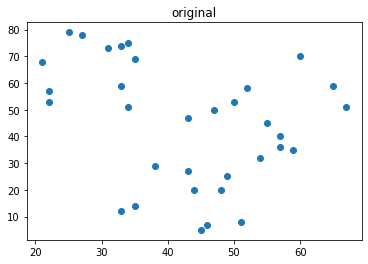

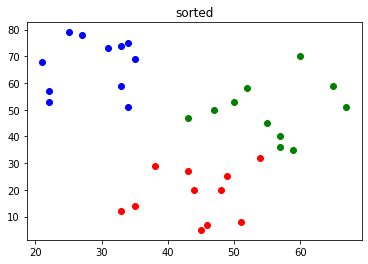

label =  [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 2.]


In [ ]:
label = kmeans(df,3, plot=1)
print("label = ",label)

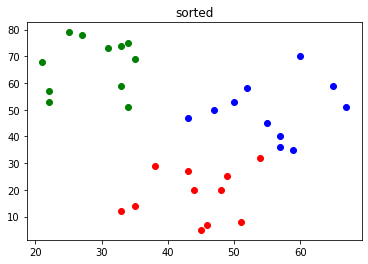

In [ ]:
# FL5
# 1. Design k-means algorithm
def dist(x,y):
  d = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
  return d
def kmeans(df, k, maxiter=20):
  x = df.iloc[:,0].values; y = df.iloc[:,1].values
  ind = np.zeros([x.size]); nind = np.copy(ind); dis = np.zeros([x.size,k]); g = np.zeros([k,2])
  ran = sample(range(x.size),k)
  for i in range(k):
    g[i,:] = [x[ran[i]],y[ran[i]]]
  for j in range(x.size):
    point = [x[j],y[j]]
    for i in range(k):
      dis[j,i] = dist(point,g[i,:])
    nind[j] = np.argmin(dis[j,:])
  iter = 0;
  while(not(np.array_equal(nind,ind))):
    ind = np.copy(nind)
    g = np.zeros([k,2])
    count = np.zeros(k)
    for i in range(k):
      for j in range(x.size):
        if ind[j] == i:
          g[i,:] = g[i,:] + [x[j],y[j]]
          count[i] = count[i] + 1
      g[i,:] = g[i,:] / count[i]
    for j in range(x.size):
      point = [x[j],y[j]]
      for i in range(k):
        dis[j,i] = dist(point,g[i,:])
      nind[j] = np.argmin(dis[j,:])
    iter = iter + 1
  return nind
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv',header=None, encoding='utf-8')
k = 3
ind = kmeans(df, k)
x = df.iloc[:,0].values; y = df.iloc[:,1].values
color = ["r", "g", "b", "c", "m", "y", "k"]
for i in range(k):
  plt.scatter(x[ind==i], y[ind==i], c=color[i])
plt.title('sorted')
plt.show()